**Import Libraries**

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud,STOPWORDS
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from string import punctuation
from textblob import TextBlob
import string , spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
punctuations = string.punctuation
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Read Fake File**

In [45]:
df1= pd.read_csv("Fake.csv")
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Keep only Text column and make label column**

In [46]:
df1.drop('title', axis=1, inplace=True )
df1.drop('subject', axis=1, inplace=True )
df1.drop('date', axis=1, inplace=True )
df1['label']='0'
df1

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


**Read True File**

In [47]:
df2= pd.read_csv("True.csv")
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


**Keep only Text column and make label column**

In [48]:
df2.drop('title', axis=1, inplace=True )
df2.drop('subject', axis=1, inplace=True )
df2.drop('date', axis=1, inplace=True )
df2['label']='1'
df2

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [49]:
df1.shape

(23481, 2)

In [50]:
df2.shape

(21417, 2)

**Concatenate the two csv files in one csv file**

In [51]:
df = pd.concat([df1, df2])

# Write the concatenated DataFrame to a new CSV file
df.to_csv('df.csv', index=False)

In [52]:
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [53]:
df.shape

(44898, 2)

**Dataset Columns**

In [54]:
df.columns

Index(['text', 'label'], dtype='object')

**Shuffle the dataset(new File)**

In [55]:
import random

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=random.seed())
df.head()

,text,label
844,Trump s numerous attacks on former FBI Directo...,0
14414,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,0
20851,"America s gotta keep 5-Star Mooch, her lovely ...",0
22379,21st Century Wire says You can imagine how nat...,0
6324,WASHINGTON (Reuters) - An unprecedented pre-pr...,1


**Dataset Description**

In [56]:
df.describe()

,text,label
count,44898,44898
unique,38646,2
top,,0
freq,627,23481


**Dataset Information**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 844 to 12539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


**Dataset Data Types**

In [58]:
df.dtypes

text     object
label    object
dtype: object

**Check null values**

In [59]:
df.isna()

,text,label
844,False,False
14414,False,False
20851,False,False
22379,False,False
6324,False,False
...,...,...
9159,False,False
7856,False,False
16391,False,False
9669,False,False


**Drop Columns With NaN Values**

In [60]:
df.dropna()

,text,label
844,Trump s numerous attacks on former FBI Directo...,0
14414,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,0
20851,"America s gotta keep 5-Star Mooch, her lovely ...",0
22379,21st Century Wire says You can imagine how nat...,0
6324,WASHINGTON (Reuters) - An unprecedented pre-pr...,1
...,...,...
9159,"Orlando, Fla. (Reuters) - A day before the Orl...",1
7856,It s time to get absolutely real about somethi...,0
16391,"United States Army veteran, A.D. Bell, tore in...",0
9669,Batman fans who have been looking forward to t...,0


**check duplicates**

In [61]:
df.duplicated()

844      False
14414    False
20851    False
22379    False
6324     False
         ...  
9159     False
7856     False
16391     True
9669      True
12539     True
Length: 44898, dtype: bool

**Remove Duplicates**

In [62]:
new_df=df.drop_duplicates()
new_df

,text,label
844,Trump s numerous attacks on former FBI Directo...,0
14414,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,0
20851,"America s gotta keep 5-Star Mooch, her lovely ...",0
22379,21st Century Wire says You can imagine how nat...,0
6324,WASHINGTON (Reuters) - An unprecedented pre-pr...,1
...,...,...
20538,Keep your white Jesus is all you need to hea...,0
8418,The Koch Brothers arranged their meeting of we...,0
7581,SYDNEY (Reuters) - The death of Australian bat...,1
9159,"Orlando, Fla. (Reuters) - A day before the Orl...",1


**Dataset Shape**

In [63]:
new_df.shape

(38647, 2)

In [64]:
new_df.columns

Index(['text', 'label'], dtype='object')

**Plot the label columns**

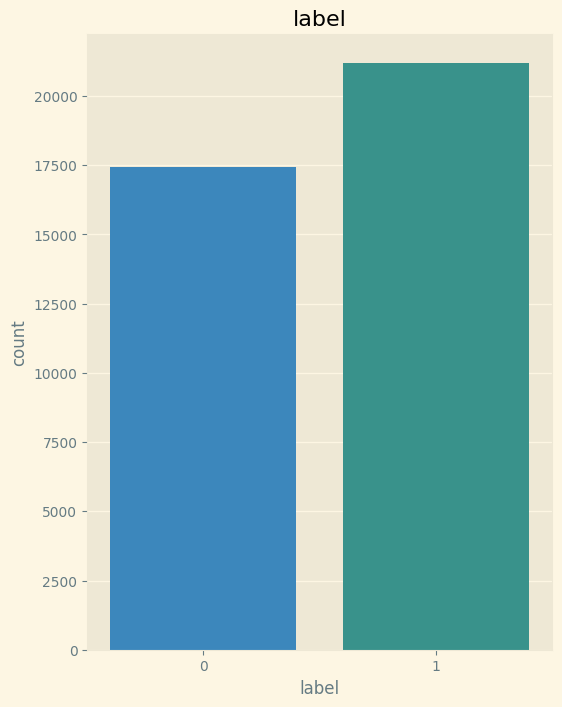

In [65]:
def drawPlots():
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(6, 8))
    plt.title("label")
    sns.countplot(x="label", data=new_df)
    plt.show()
drawPlots()

<Axes: ylabel='label'>

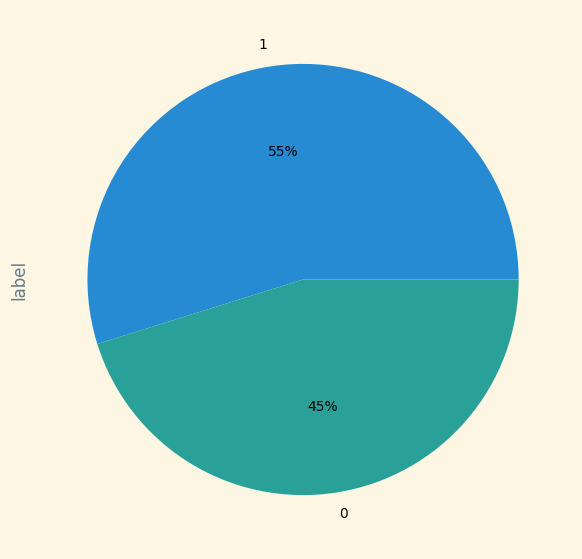

In [66]:
new_df.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

**Dataset Preprocessing**

In [67]:
# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
def preprocess_text(text):
    # Convert the input text to lowercase
    text= re.sub(r'(.)\1\1+', r'\1\1', text)
    text= re.sub(r'@[A-Za-z0-9_]+', r' ', text)
    text= re.sub(r'#[A-Za-z0-9_]+', r' ', text)
    text= re.sub(r'http\S+|www.\S+|<.*?>', r' ', text)

    # Removing stop words
    text = [ word for word in text if word not in stop_words and word not in punctuations ]

    # Do other preprocessing steps as needed
    return text



# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()



In [68]:
bow_vector = CountVectorizer(tokenizer = preprocess_text, ngram_range=(1,1))

In [69]:
tfidf_vector = TfidfVectorizer(tokenizer = preprocess_text)

In [70]:
X = new_df['text'] # the features we want to analyze
ylabels = new_df['label'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2)

In [71]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
classifier1 = LogisticRegression()
classifier2= SVC(kernel='linear')


# Create pipeline using Bag of Words
pipe1 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier1)])
# model generation
pipe1.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f5cae6c4970>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function preprocess_text at 0x7f5caeb14670>)),
                ('classifier', LogisticRegression())])

In [72]:
from sklearn import metrics
# Predicting with a test dataset
predicted1 = pipe1.predict(X_test)


# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted1))



Logistic Regression Accuracy: 0.8667529107373868


In [73]:
confusion_matrix= confusion_matrix(y_test, predicted1)
confusion_matrix

array([[2989,  534],
       [ 496, 3711]])

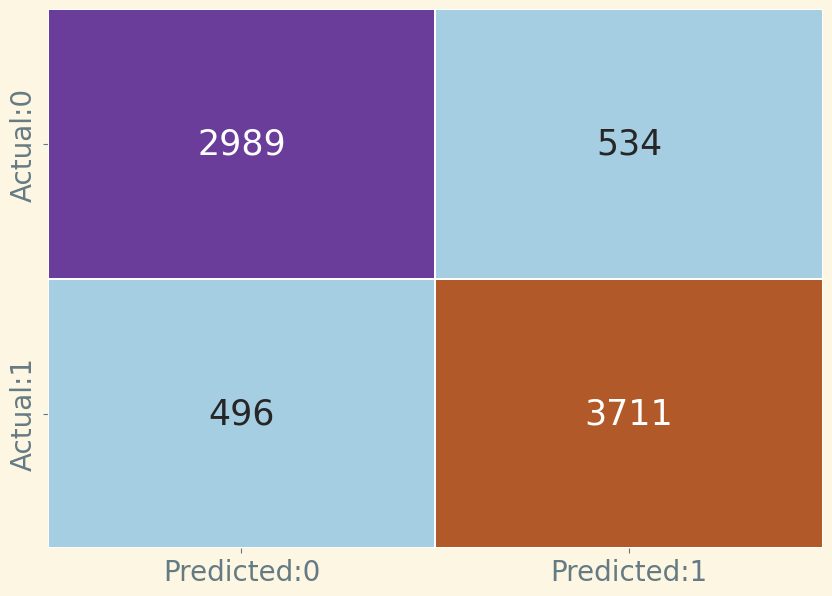

In [74]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [10,7]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = confusion_matrix,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()